### About Dataset
The dataset comprises information on 1000 customers, with 84 features derived from their financial transactions and current financial standing. The primary objective is to leverage this dataset for credit risk estimation and predicting potential defaults.

- CUST_ID: Unique customer identifier
Key Target Variables:

- CREDIT_SCORE: Numerical target variable representing the customer's credit score (integer)
- DEFAULT: Binary target variable indicating if the customer has defaulted (1) or not (0)
Description of Features:

- INCOME: Total income in the last 12 months
- SAVINGS: Total savings in the last 12 months
- DEBT: Total existing debt
- R_SAVINGS_INCOME: Ratio of savings to income
- R_DEBT_INCOME: Ratio of debt to income
- R_DEBT_SAVINGS: Ratio of debt to savings

### Transaction groups (GROCERIES, CLOTHING, HOUSING, EDUCATION, HEALTH, TRAVEL, ENTERTAINMENT, GAMBLING, UTILITIES, TAX, FINES) are categorized.

- T_{GROUP}_6: Total expenditure in that group in the last 6 months
- T_GROUP_12: Total expenditure in that group in the last 12 months
- R_[GROUP]: Ratio of T_[GROUP]6 to T[GROUP]_12
- R_[GROUP]INCOME: Ratio of T[GROUP]_12 to INCOME
- R_[GROUP]SAVINGS: Ratio of T[GROUP]_12 to SAVINGS
- R_[GROUP]DEBT: Ratio of T[GROUP]_12 to DEBT
### Categorical Features:

- CAT_GAMBLING: Gambling category (none, low, high)
- CAT_DEBT: 1 if the customer has debt; 0 otherwise
- CAT_CREDIT_CARD: 1 if the customer has a credit card; 0 otherwise
- CAT_MORTGAGE: 1 if the customer has a mortgage; 0 otherwise
- CAT_SAVINGS_ACCOUNT: 1 if the customer has a savings account; 0 otherwise
- CAT_DEPENDENTS: 1 if the customer has any dependents; 0 otherwise
### See XAI course based on this dataset: https://adataodyssey.com/courses/xai-with-python/

In [68]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('../../data/for_modelling/credit_score_train.csv')
df_val = pd.read_csv('../../data/for_modelling/credit_score_valid.csv')
df_test = pd.read_csv('../../data/for_modelling/credit_score_test.csv')
df=pd.concat([df_train, df_val, df_test])
df.head()

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,2783,1855,0,0.6665,0.00,0.0000,103,74,0.7184,0.0370,...,2.5003,0.0000,No,0,0,0,1,0,570,0
1,314430,445442,707468,1.4167,2.25,1.5882,35861,29157,0.8131,0.1141,...,0.5882,0.3704,High,1,0,1,1,0,691,0
2,161773,517674,2782496,3.2000,17.20,5.3750,3716,2533,0.6816,0.0230,...,0.3125,0.0581,No,1,1,1,1,1,520,0
3,16014,97685,20818,6.1000,1.30,0.2131,637,187,0.2936,0.0398,...,0.1639,0.7692,No,1,0,0,1,0,654,0
4,193225,1410542,2589215,7.3000,13.40,1.8356,5276,2325,0.4407,0.0273,...,0.1370,0.0746,No,1,1,0,1,1,552,0


In [69]:
#shape
df.shape

(700, 86)

We are going to predict  default column

FULL Automatic EDA is not possible because of the number of columns. It generates 1 GB of html file. We will do it manually

In [70]:
target = 'DEFAULT'

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INCOME,700.0,123153.417143,1.128651e+05,0.0,31631.000,86710.00000,1.857160e+05,6.620940e+05
SAVINGS,700.0,422860.080000,4.444269e+05,0.0,68743.500,294634.50000,6.454072e+05,2.738164e+06
DEBT,700.0,832511.910000,1.018535e+06,0.0,53206.250,408463.50000,1.302525e+06,5.968620e+06
R_SAVINGS_INCOME,700.0,4.188402,4.029263e+00,0.0,1.089,2.69615,6.584700e+00,1.611120e+01
R_DEBT_INCOME,700.0,6.066176,5.770170e+00,0.0,1.500,4.93055,8.652300e+00,3.700060e+01
...,...,...,...,...,...,...,...,...
CAT_MORTGAGE,700.0,0.182857,3.868258e-01,0.0,0.000,0.00000,0.000000e+00,1.000000e+00
CAT_SAVINGS_ACCOUNT,700.0,0.995714,6.537164e-02,0.0,1.000,1.00000,1.000000e+00,1.000000e+00
CAT_DEPENDENTS,700.0,0.170000,3.759014e-01,0.0,0.000,0.00000,0.000000e+00,1.000000e+00
CREDIT_SCORE,700.0,586.937143,6.203980e+01,300.0,555.000,593.00000,6.290000e+02,8.000000e+02


In [72]:
df.describe(include='object').T

,count,unique,top,freq
CAT_GAMBLING,700,3,No,438


In [73]:
numerical_data = df.select_dtypes(include=[np.number])
#variance
numerical_data.var().sort_values(ascending=False)

DEBT                1.037414e+12
SAVINGS             1.975153e+11
INCOME              1.273853e+10
T_EXPENDITURE_12    7.758316e+09
T_EXPENDITURE_6     2.372973e+09
                        ...     
R_EDUCATION         3.663628e-06
R_UTILITIES         3.629224e-06
R_FINES_INCOME      2.253293e-06
R_FINES_DEBT        8.291699e-07
R_HOUSING           1.267738e-08
Length: 85, dtype: float64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 71
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCOME                   700 non-null    int64  
 1   SAVINGS                  700 non-null    int64  
 2   DEBT                     700 non-null    int64  
 3   R_SAVINGS_INCOME         700 non-null    float64
 4   R_DEBT_INCOME            700 non-null    float64
 5   R_DEBT_SAVINGS           700 non-null    float64
 6   T_CLOTHING_12            700 non-null    int64  
 7   T_CLOTHING_6             700 non-null    int64  
 8   R_CLOTHING               700 non-null    float64
 9   R_CLOTHING_INCOME        700 non-null    float64
 10  R_CLOTHING_SAVINGS       700 non-null    float64
 11  R_CLOTHING_DEBT          700 non-null    float64
 12  T_EDUCATION_12           700 non-null    int64  
 13  T_EDUCATION_6            700 non-null    int64  
 14  R_EDUCATION              700 non

There are no missing values in the dataset

In [75]:
df.nunique()

INCOME                 666
SAVINGS                697
DEBT                   660
R_SAVINGS_INCOME       386
R_DEBT_INCOME          429
                      ... 
CAT_MORTGAGE             2
CAT_SAVINGS_ACCOUNT      2
CAT_DEPENDENTS           2
CREDIT_SCORE           224
DEFAULT                  2
Length: 86, dtype: int64

In [76]:
# Let's check the distribution of the each gambing category according to the default
df['CAT_GAMBLING'].value_counts()

CAT_GAMBLING
No      438
High    183
Low      79
Name: count, dtype: int64

<Axes: xlabel='CAT_GAMBLING', ylabel='count'>

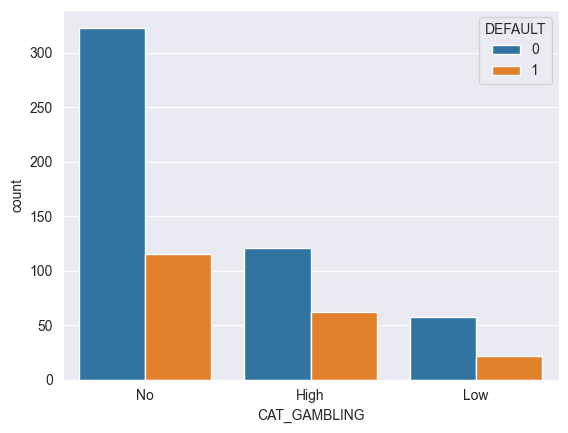

In [77]:
sns.countplot(data=df, x='CAT_GAMBLING', hue=target)

We see something interesting. People with high gambling category have higher default rate.

In [78]:
# Let's check the distribution of the each debt category according to the default
df['CAT_DEBT'].value_counts()

CAT_DEBT
1    660
0     40
Name: count, dtype: int64

<Axes: xlabel='CAT_DEBT', ylabel='count'>

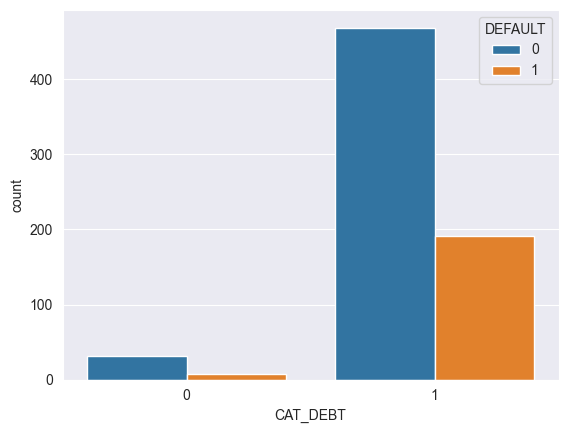

In [79]:
sns.countplot(data=df, x='CAT_DEBT', hue=target)

We see something interesting. People with debt have higher default rate, but there are small number of people without debt.

array([[<Axes: title={'center': 'INCOME'}>,
        <Axes: title={'center': 'SAVINGS'}>,
        <Axes: title={'center': 'DEBT'}>,
        <Axes: title={'center': 'R_SAVINGS_INCOME'}>,
        <Axes: title={'center': 'R_DEBT_INCOME'}>,
        <Axes: title={'center': 'R_DEBT_SAVINGS'}>,
        <Axes: title={'center': 'T_CLOTHING_12'}>,
        <Axes: title={'center': 'T_CLOTHING_6'}>,
        <Axes: title={'center': 'R_CLOTHING'}>],
       [<Axes: title={'center': 'R_CLOTHING_INCOME'}>,
        <Axes: title={'center': 'R_CLOTHING_SAVINGS'}>,
        <Axes: title={'center': 'R_CLOTHING_DEBT'}>,
        <Axes: title={'center': 'T_EDUCATION_12'}>,
        <Axes: title={'center': 'T_EDUCATION_6'}>,
        <Axes: title={'center': 'R_EDUCATION'}>,
        <Axes: title={'center': 'R_EDUCATION_INCOME'}>,
        <Axes: title={'center': 'R_EDUCATION_SAVINGS'}>,
        <Axes: title={'center': 'R_EDUCATION_DEBT'}>],
       [<Axes: title={'center': 'T_ENTERTAINMENT_12'}>,
        <Axes: title={

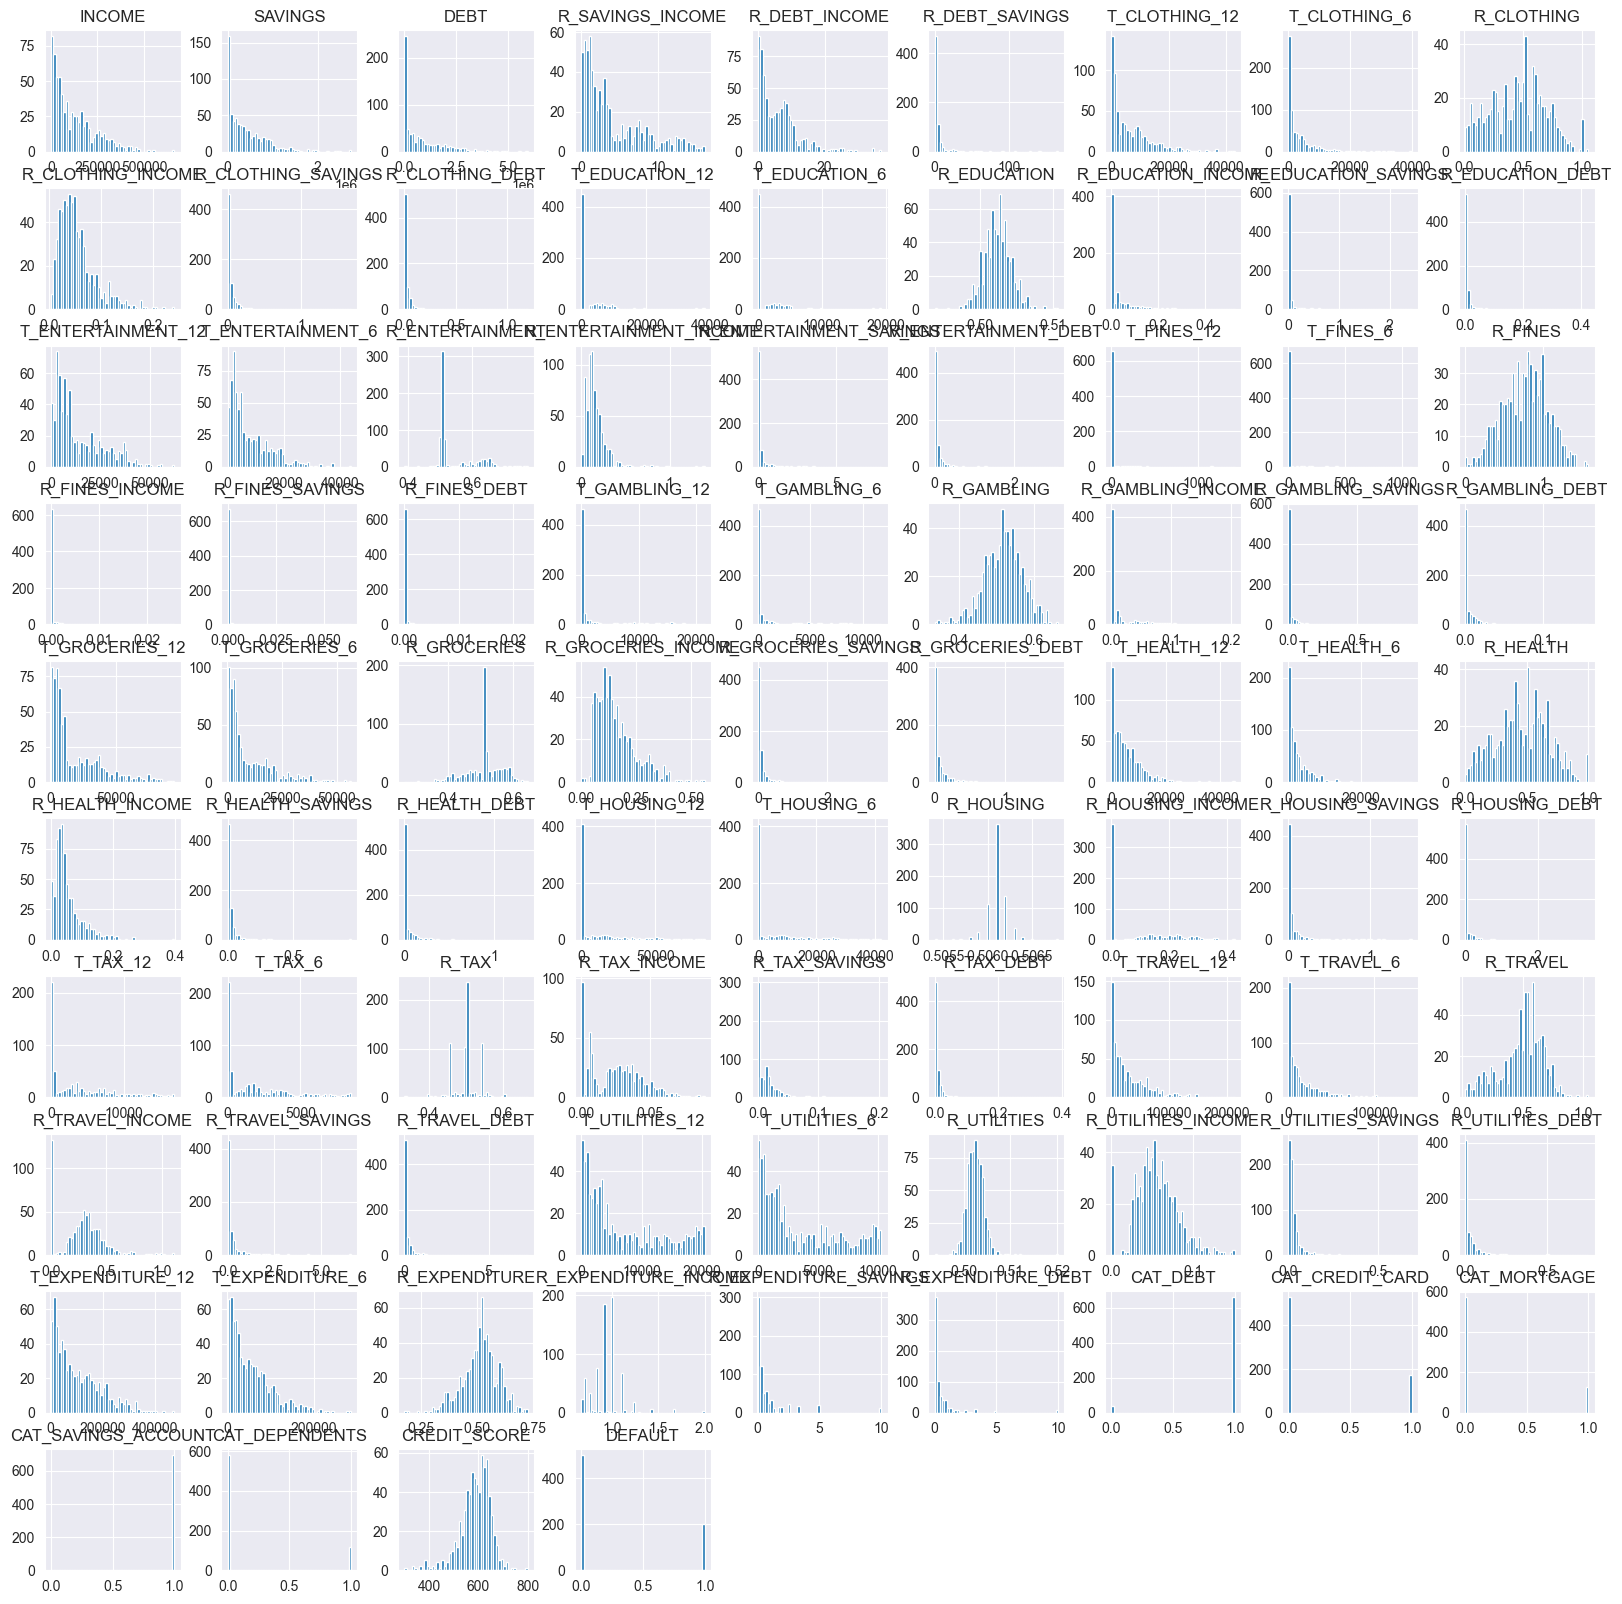

In [80]:
#plt.figure(figsize=(20,20))
df.hist(bins=50, figsize=(20,20))

In [81]:
#how many numeric columns are here
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns

['INCOME',
 'SAVINGS',
 'DEBT',
 'R_SAVINGS_INCOME',
 'R_DEBT_INCOME',
 'R_DEBT_SAVINGS',
 'T_CLOTHING_12',
 'T_CLOTHING_6',
 'R_CLOTHING',
 'R_CLOTHING_INCOME',
 'R_CLOTHING_SAVINGS',
 'R_CLOTHING_DEBT',
 'T_EDUCATION_12',
 'T_EDUCATION_6',
 'R_EDUCATION',
 'R_EDUCATION_INCOME',
 'R_EDUCATION_SAVINGS',
 'R_EDUCATION_DEBT',
 'T_ENTERTAINMENT_12',
 'T_ENTERTAINMENT_6',
 'R_ENTERTAINMENT',
 'R_ENTERTAINMENT_INCOME',
 'R_ENTERTAINMENT_SAVINGS',
 'R_ENTERTAINMENT_DEBT',
 'T_FINES_12',
 'T_FINES_6',
 'R_FINES',
 'R_FINES_INCOME',
 'R_FINES_SAVINGS',
 'R_FINES_DEBT',
 'T_GAMBLING_12',
 'T_GAMBLING_6',
 'R_GAMBLING',
 'R_GAMBLING_INCOME',
 'R_GAMBLING_SAVINGS',
 'R_GAMBLING_DEBT',
 'T_GROCERIES_12',
 'T_GROCERIES_6',
 'R_GROCERIES',
 'R_GROCERIES_INCOME',
 'R_GROCERIES_SAVINGS',
 'R_GROCERIES_DEBT',
 'T_HEALTH_12',
 'T_HEALTH_6',
 'R_HEALTH',
 'R_HEALTH_INCOME',
 'R_HEALTH_SAVINGS',
 'R_HEALTH_DEBT',
 'T_HOUSING_12',
 'T_HOUSING_6',
 'R_HOUSING',
 'R_HOUSING_INCOME',
 'R_HOUSING_SAVINGS',
 'R

In [82]:
len(numeric_columns)

85

In [83]:
# remove from numeric columns columns with T or R as first letter
numeric_columns = [col for col in numeric_columns if not col.startswith('T_') and not col.startswith('R_')]
# remove last one
numeric_columns = numeric_columns[:-1]
numeric_columns

['INCOME',
 'SAVINGS',
 'DEBT',
 'CAT_DEBT',
 'CAT_CREDIT_CARD',
 'CAT_MORTGAGE',
 'CAT_SAVINGS_ACCOUNT',
 'CAT_DEPENDENTS',
 'CREDIT_SCORE']

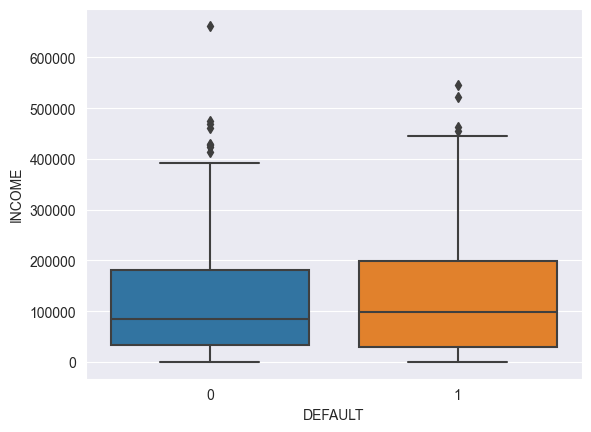

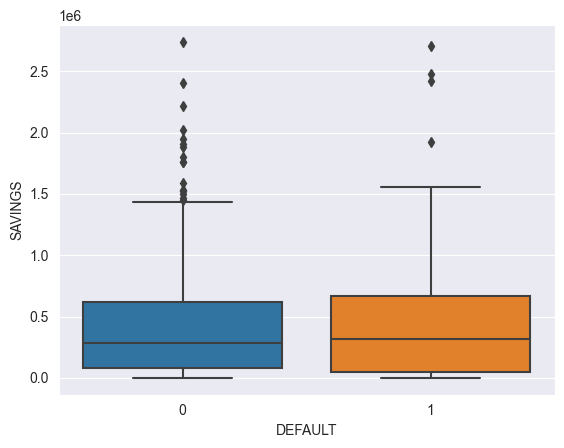

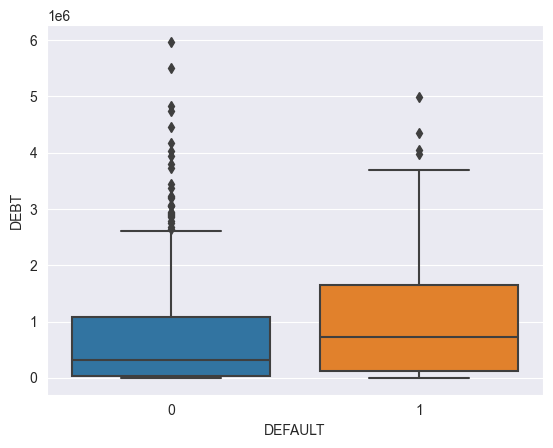

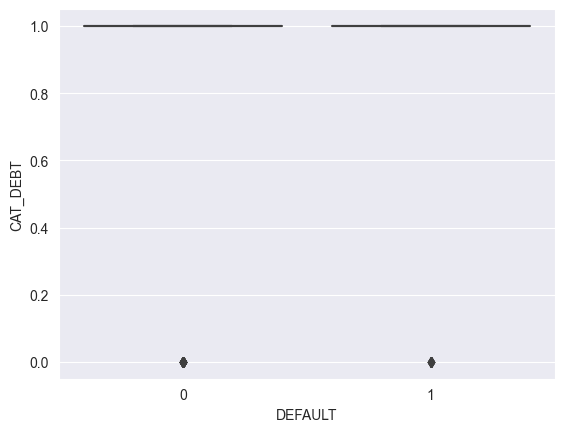

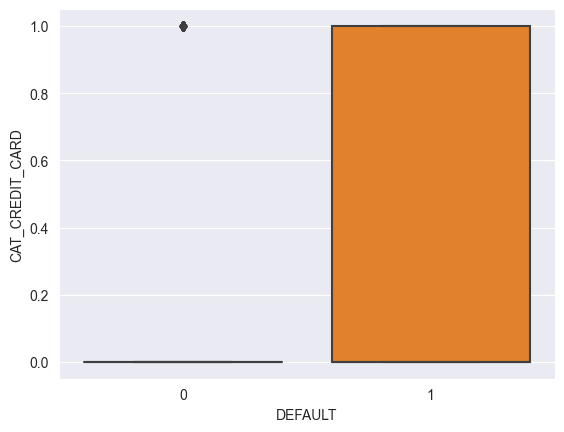

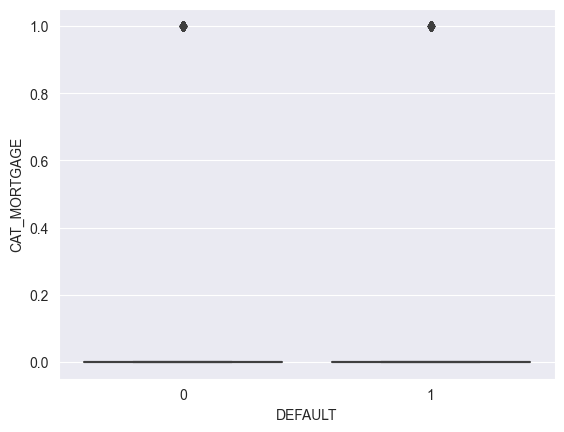

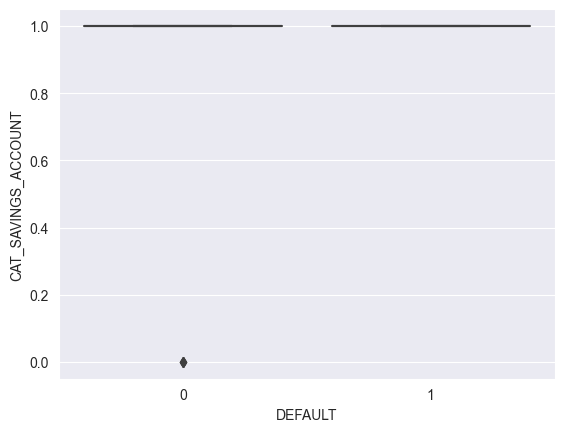

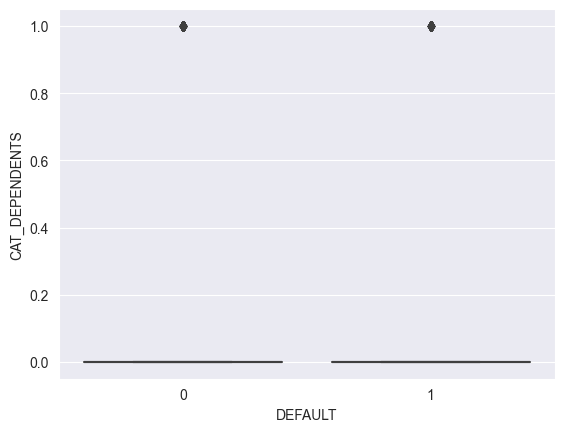

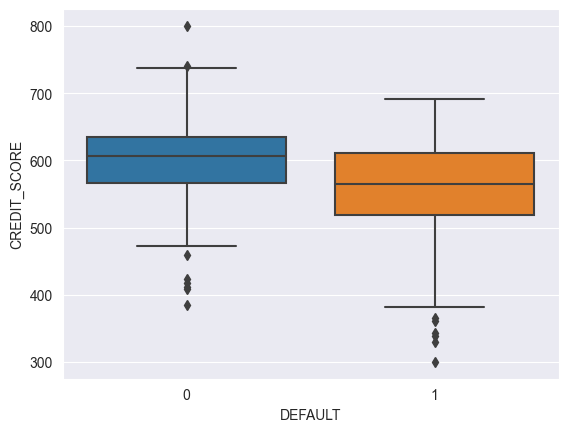

In [84]:
for col in numeric_columns:
    sns.boxplot(data=df, x=target, y=col)
    plt.show()

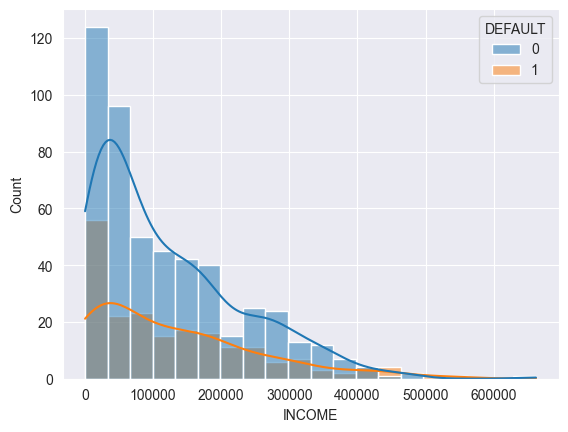

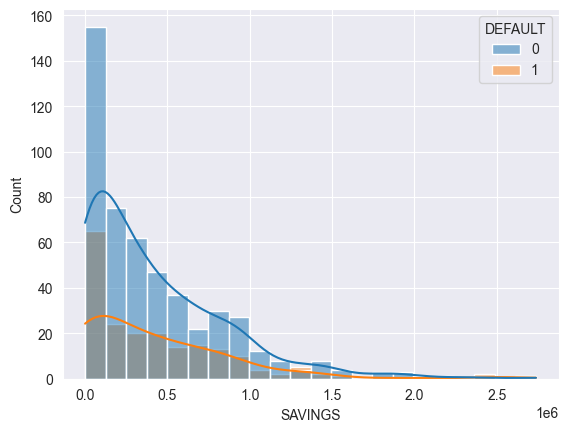

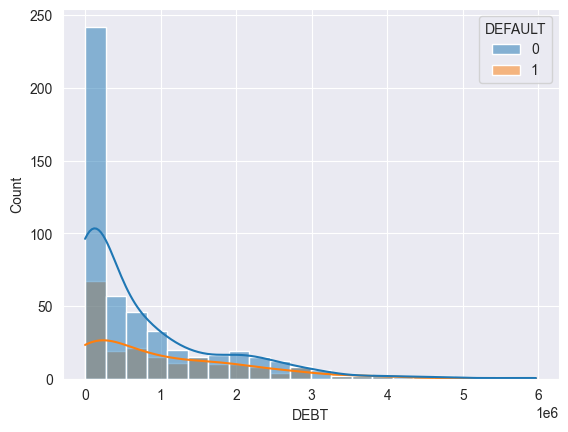

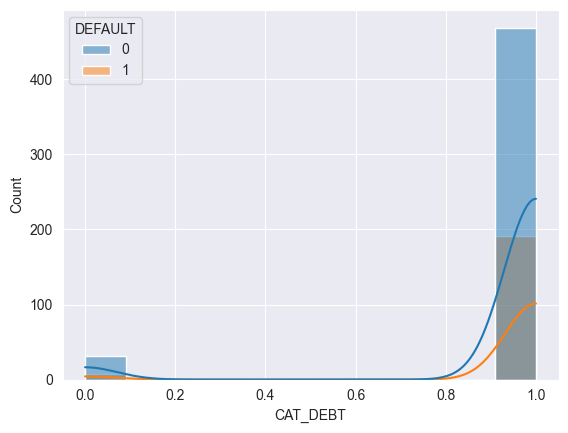

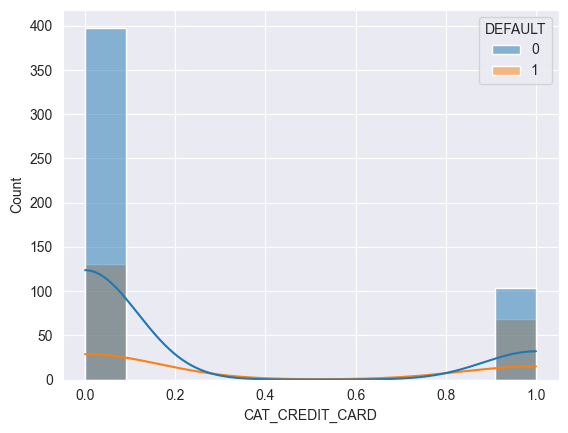

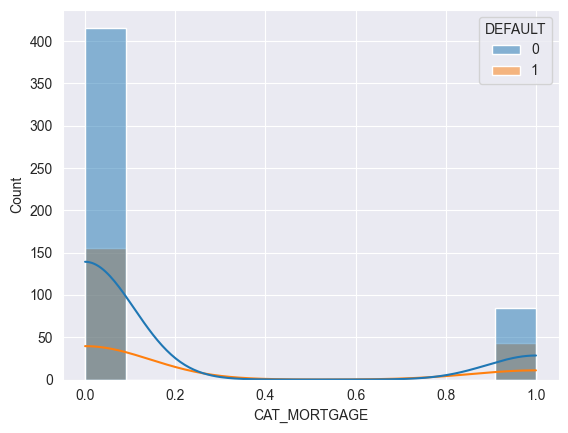

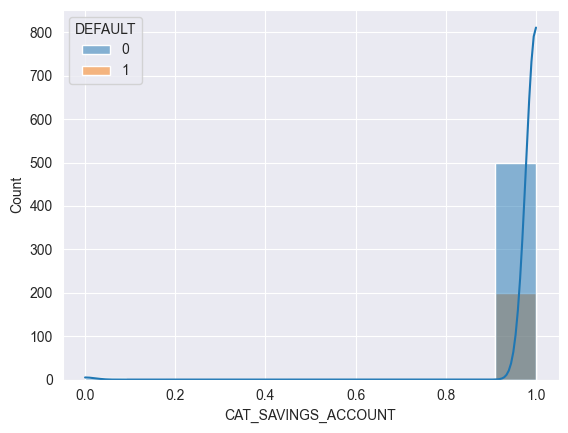

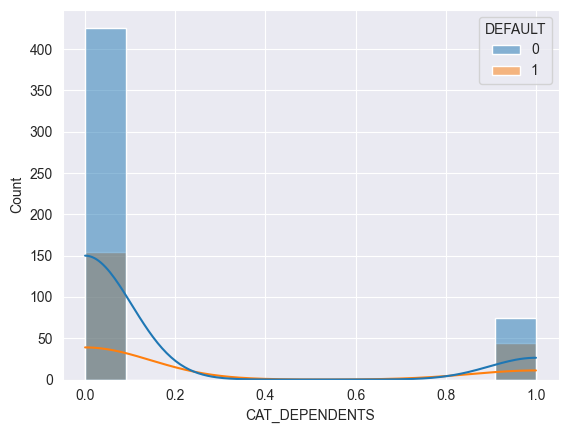

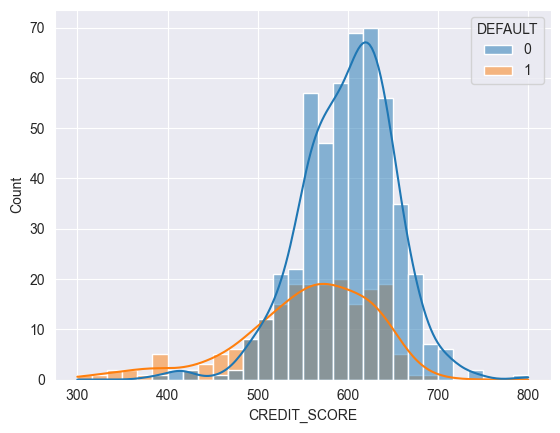

In [85]:
#histogram of numeric_columns
for col in numeric_columns:
    sns.histplot(data=df, x=col, hue=target, kde=True)
    plt.show()

In [86]:
#correlation matrix without first column
correlation_matrix = df[numeric_columns].corr()
correlation_matrix

,INCOME,SAVINGS,DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
INCOME,1.000000,0.631249,0.803271,0.238511,0.565158,0.377615,0.063742,0.221186,-0.027933
SAVINGS,0.631249,1.000000,0.552011,0.212489,0.359607,0.404393,0.062467,0.550932,0.032730
DEBT,0.803271,0.552011,1.000000,0.201365,0.682302,0.348088,0.051643,0.363646,-0.370523
CAT_DEBT,0.238511,0.212489,0.201365,1.000000,0.139968,0.116457,0.078064,0.111415,-0.191750
CAT_CREDIT_CARD,0.565158,0.359607,0.682302,0.139968,1.000000,0.247131,0.037300,0.247219,-0.243283
CAT_MORTGAGE,0.377615,0.404393,0.348088,0.116457,0.247131,1.000000,-0.025539,0.248326,-0.001428
CAT_SAVINGS_ACCOUNT,0.063742,0.062467,0.051643,0.078064,0.037300,-0.025539,1.000000,0.029691,-0.022290
CAT_DEPENDENTS,0.221186,0.550932,0.363646,0.111415,0.247219,0.248326,0.029691,1.000000,-0.165847
CREDIT_SCORE,-0.027933,0.032730,-0.370523,-0.191750,-0.243283,-0.001428,-0.022290,-0.165847,1.000000


<Axes: >

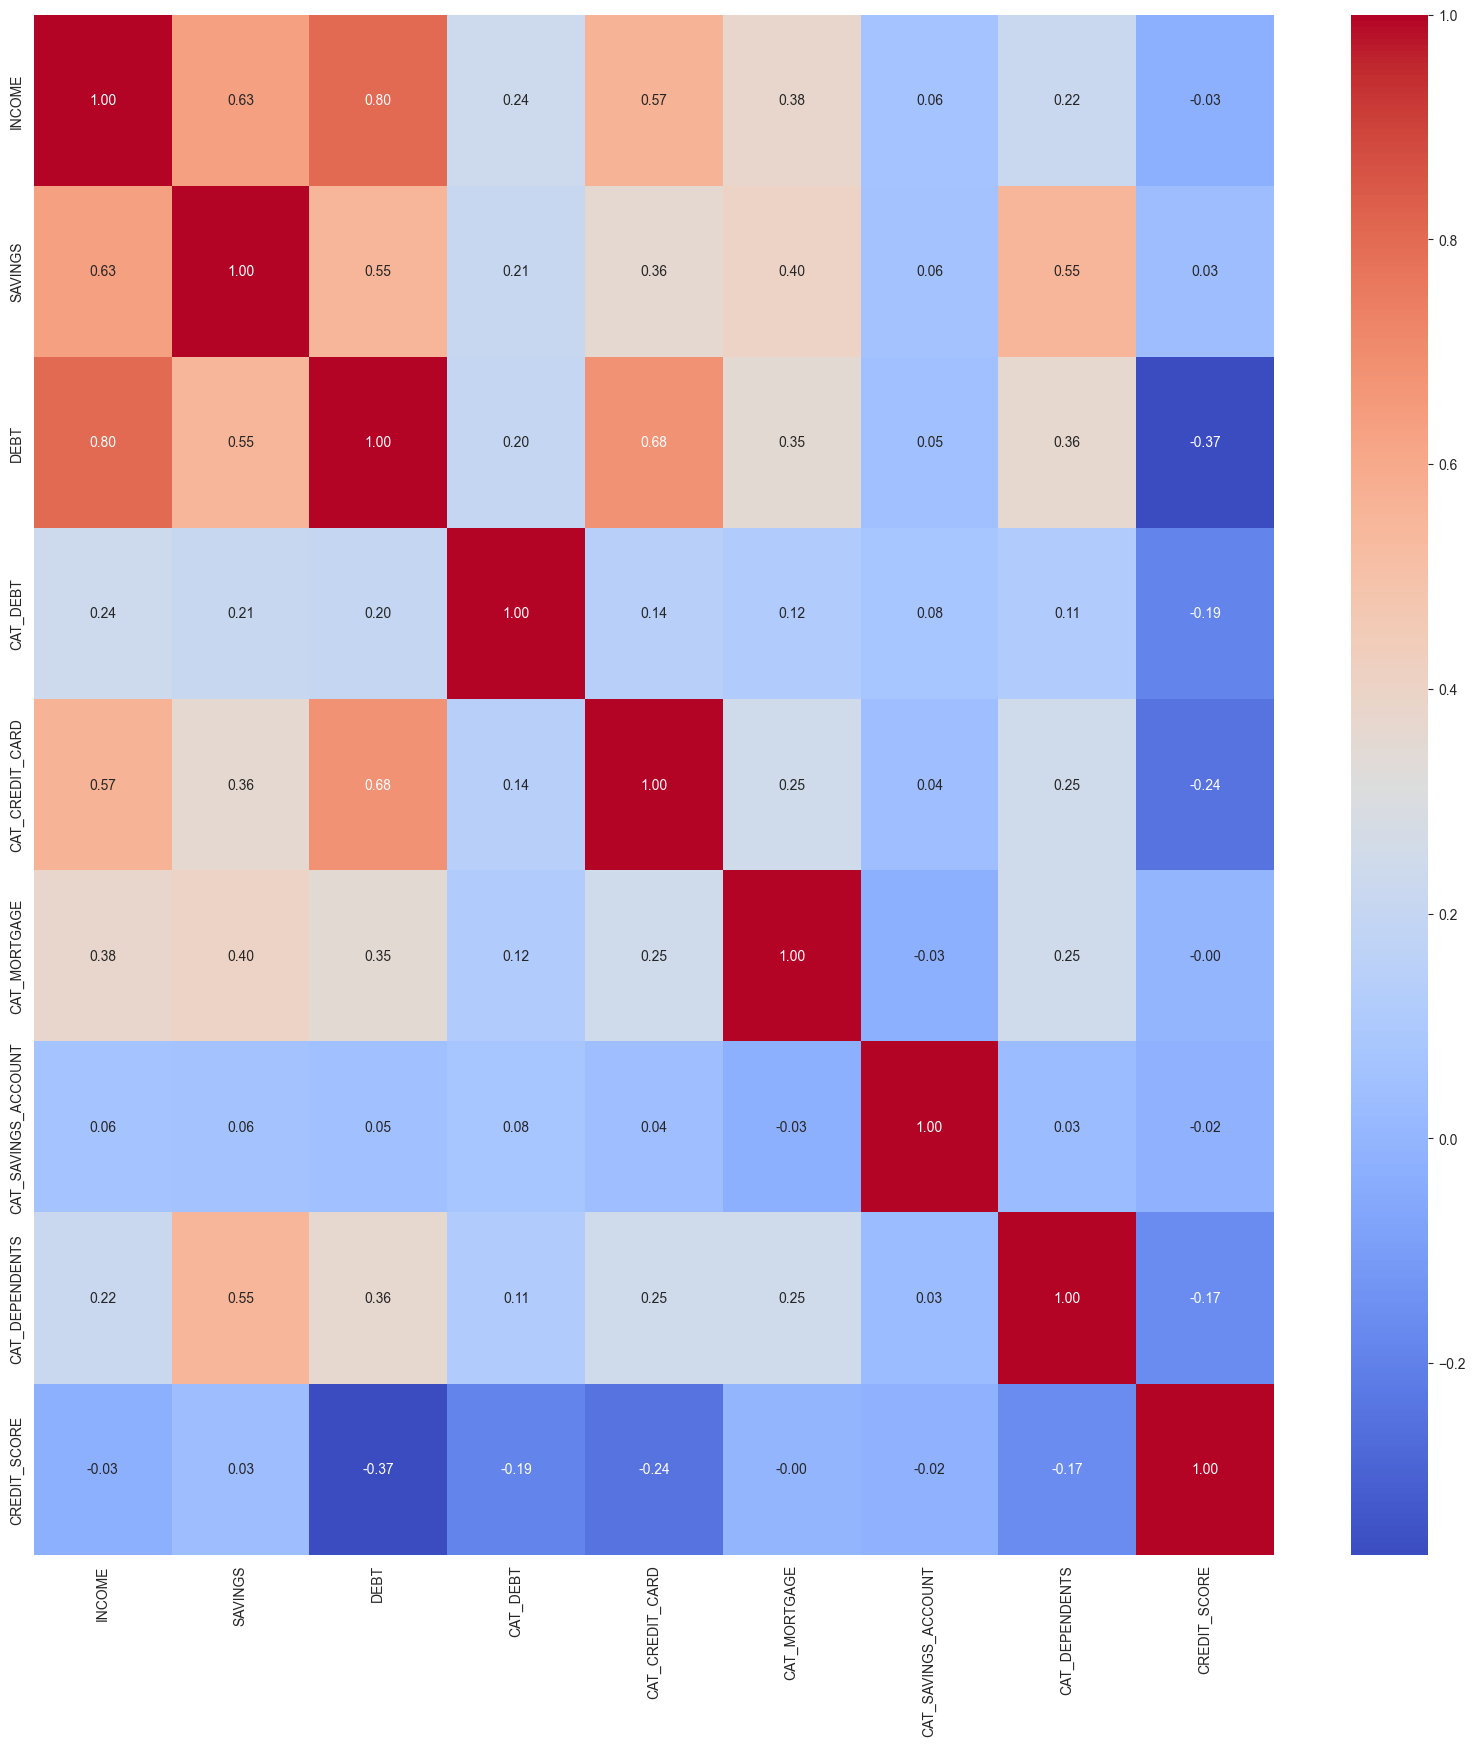

In [87]:
#correlation matrix heatmap
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

In [88]:
df_numeric = df[numeric_columns]
df_numeric

,INCOME,SAVINGS,DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE
0,2783,1855,0,0,0,0,1,0,570
1,314430,445442,707468,1,0,1,1,0,691
2,161773,517674,2782496,1,1,1,1,1,520
3,16014,97685,20818,1,0,0,1,0,654
4,193225,1410542,2589215,1,1,0,1,1,552
...,...,...,...,...,...,...,...,...,...
67,0,15813,14759,1,0,0,1,0,551
68,0,5548,70541,1,0,0,1,0,623
69,28181,11272,397352,1,0,0,1,0,544
70,0,27524,100088,1,0,0,1,0,487


In [22]:
#autoEDA
from pandas_profiling import ProfileReport
profile = ProfileReport(df_numeric, title='Pandas Profiling Report', explorative=True)
profile.to_file("output.html")

/opt/homebrew/lib/python3.11/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### We will try to find some columns that we should remove
- We will take a look at the correlation matrix

In [89]:
df_without_id= df.drop("CAT_GAMBLING", axis=1)
correlation_matrix = df_without_id.corr()
correlation_matrix

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
INCOME,1.000000,0.631249,0.803271,-0.207376,0.127765,-0.140736,0.776460,0.643741,0.093904,0.028612,...,-0.573819,-0.270581,-0.239171,0.238511,0.565158,0.377615,0.063742,0.221186,-0.027933,0.045135
SAVINGS,0.631249,1.000000,0.552011,0.372297,0.043673,-0.243297,0.322978,0.256419,0.043346,-0.222686,...,-0.304662,-0.388377,-0.043079,0.212489,0.359607,0.404393,0.062467,0.550932,0.032730,0.013071
DEBT,0.803271,0.552011,1.000000,-0.197384,0.469225,-0.014101,0.579461,0.471929,0.051920,-0.019910,...,-0.435652,-0.210154,-0.301902,0.201365,0.682302,0.348088,0.051643,0.363646,-0.370523,0.132779
R_SAVINGS_INCOME,-0.207376,0.372297,-0.197384,1.000000,-0.297208,-0.297939,-0.306227,-0.232741,0.029812,-0.278953,...,0.099404,-0.427717,0.294334,0.172822,-0.154460,0.022274,0.068246,0.140270,0.229752,-0.054493
R_DEBT_INCOME,0.127765,0.043673,0.469225,-0.297208,1.000000,0.578654,0.071423,0.042760,-0.036039,0.022130,...,-0.102660,0.021254,-0.354367,0.258997,0.298215,0.056223,0.048372,0.239852,-0.851727,0.287284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAT_MORTGAGE,0.377615,0.404393,0.348088,0.022274,0.056223,-0.090536,0.179734,0.139457,0.037203,-0.085936,...,-0.168172,-0.146030,-0.095563,0.116457,0.247131,1.000000,-0.025539,0.248326,-0.001428,0.054168
CAT_SAVINGS_ACCOUNT,0.063742,0.062467,0.051643,0.068246,0.048372,0.025696,0.052451,0.039020,0.006002,0.002784,...,-0.053958,-0.015724,-0.006176,0.078064,0.037300,-0.025539,1.000000,0.029691,-0.022290,0.041348
CAT_DEPENDENTS,0.221186,0.550932,0.363646,0.140270,0.239852,-0.112150,-0.007602,-0.008226,-0.006604,-0.204891,...,-0.070303,-0.197267,-0.132132,0.111415,0.247219,0.248326,0.029691,1.000000,-0.165847,0.085746
CREDIT_SCORE,-0.027933,0.032730,-0.370523,0.229752,-0.851727,-0.495626,-0.041849,-0.059170,-0.065192,-0.054480,...,-0.005479,-0.059716,0.307891,-0.191750,-0.243283,-0.001428,-0.022290,-0.165847,1.000000,-0.332794


In [90]:
#take only where correlation is higher than 0.6
high_correlation_matrix=correlation_matrix[abs(correlation_matrix) > 0.6]
#remove rows and columns with all NaN
high_correlation_matrix=high_correlation_matrix.dropna(axis=0, how='all').dropna(axis=1, how='all')
high_correlation_matrix

,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,R_CLOTHING_INCOME,...,R_EXPENDITURE_INCOME,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
INCOME,1.000000,0.631249,0.803271,NaN,NaN,NaN,0.77646,0.643741,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SAVINGS,0.631249,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DEBT,0.803271,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.682302,NaN,NaN,NaN,NaN,NaN
R_SAVINGS_INCOME,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R_DEBT_INCOME,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.851727,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CAT_MORTGAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
CAT_SAVINGS_ACCOUNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
CAT_DEPENDENTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
CREDIT_SCORE,NaN,NaN,NaN,NaN,-0.851727,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


<Axes: >

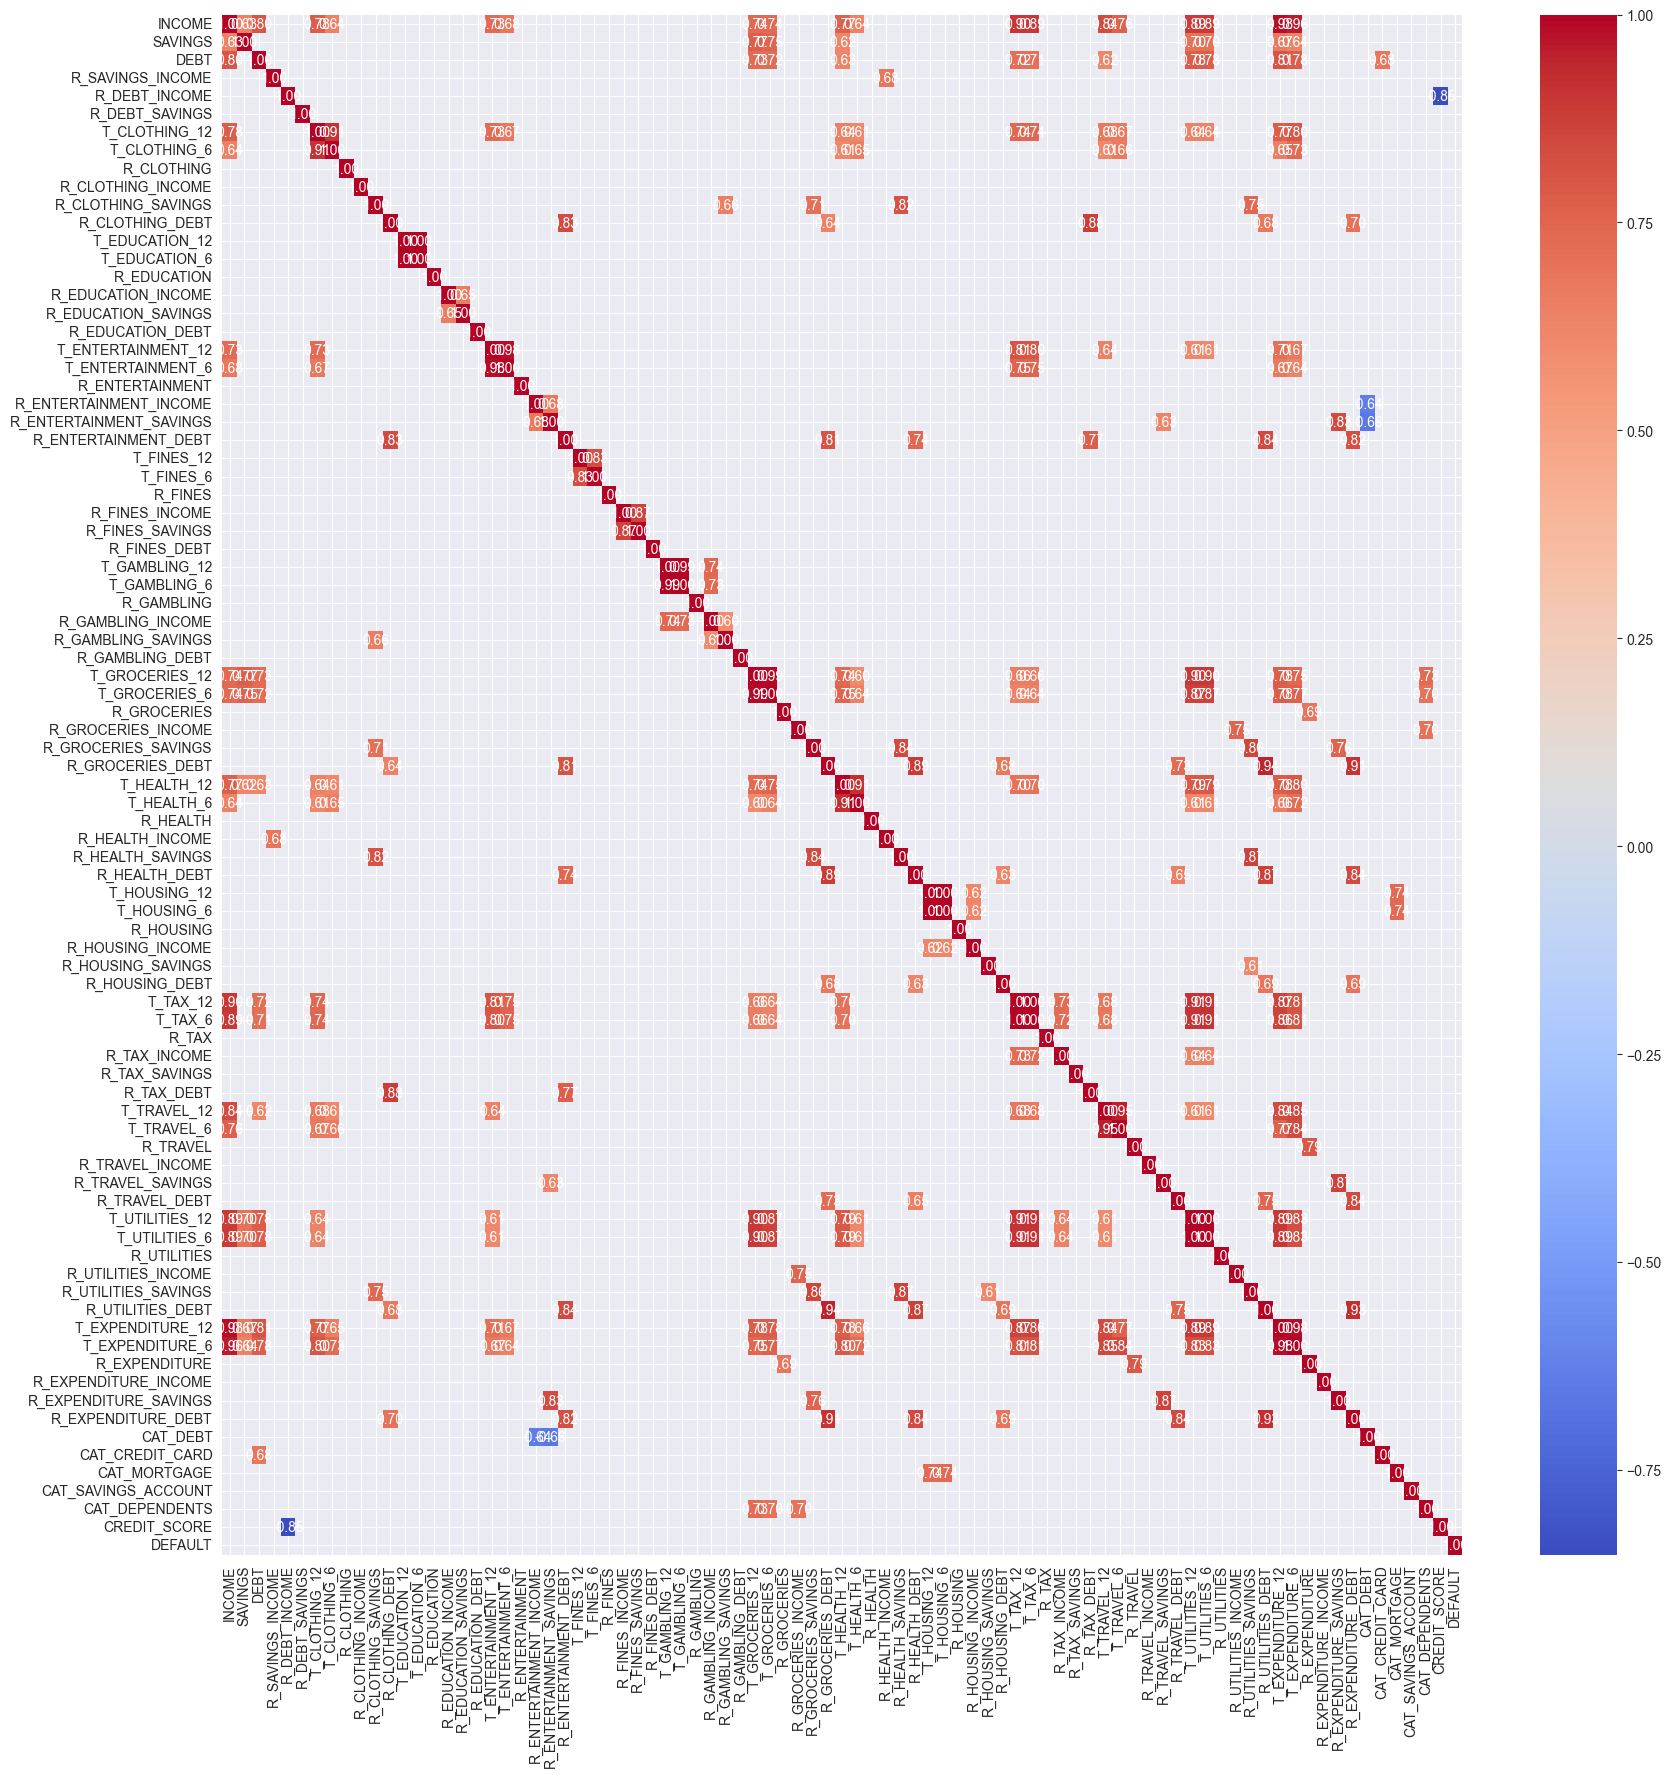

In [91]:
# plot heatmap
plt.figure(figsize=(20,20))
sns.heatmap(high_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

### Canditates for removal - high correlation with other columns
- T_TAX_6
- T_TAX_12
- T_UTILITIES_6
- T_UTILITIES_12
- T_EXPENDITURE_6
- T_EXPENDITURE_12


<Axes: xlabel='INCOME', ylabel='Count'>

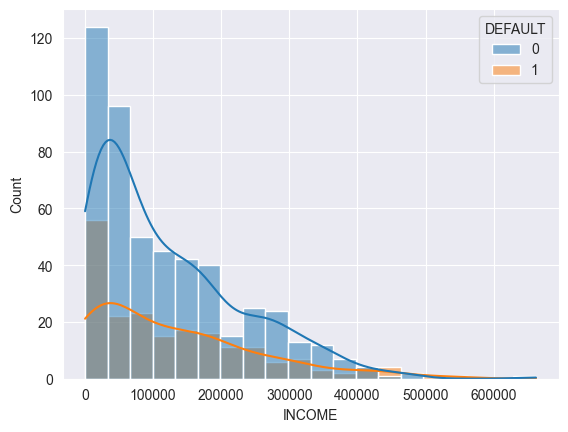

In [92]:
# stwórz histogram po Income dla DEFAULT=0 i DEFAULT=1
sns.histplot(data=df, x='INCOME', hue=target, kde=True)

In [93]:
# how many columns starting with R
r_columns = [col for col in df.columns if col.startswith('R_')]
# count
len(r_columns)

51

In [94]:
r_columns

['R_SAVINGS_INCOME',
 'R_DEBT_INCOME',
 'R_DEBT_SAVINGS',
 'R_CLOTHING',
 'R_CLOTHING_INCOME',
 'R_CLOTHING_SAVINGS',
 'R_CLOTHING_DEBT',
 'R_EDUCATION',
 'R_EDUCATION_INCOME',
 'R_EDUCATION_SAVINGS',
 'R_EDUCATION_DEBT',
 'R_ENTERTAINMENT',
 'R_ENTERTAINMENT_INCOME',
 'R_ENTERTAINMENT_SAVINGS',
 'R_ENTERTAINMENT_DEBT',
 'R_FINES',
 'R_FINES_INCOME',
 'R_FINES_SAVINGS',
 'R_FINES_DEBT',
 'R_GAMBLING',
 'R_GAMBLING_INCOME',
 'R_GAMBLING_SAVINGS',
 'R_GAMBLING_DEBT',
 'R_GROCERIES',
 'R_GROCERIES_INCOME',
 'R_GROCERIES_SAVINGS',
 'R_GROCERIES_DEBT',
 'R_HEALTH',
 'R_HEALTH_INCOME',
 'R_HEALTH_SAVINGS',
 'R_HEALTH_DEBT',
 'R_HOUSING',
 'R_HOUSING_INCOME',
 'R_HOUSING_SAVINGS',
 'R_HOUSING_DEBT',
 'R_TAX',
 'R_TAX_INCOME',
 'R_TAX_SAVINGS',
 'R_TAX_DEBT',
 'R_TRAVEL',
 'R_TRAVEL_INCOME',
 'R_TRAVEL_SAVINGS',
 'R_TRAVEL_DEBT',
 'R_UTILITIES',
 'R_UTILITIES_INCOME',
 'R_UTILITIES_SAVINGS',
 'R_UTILITIES_DEBT',
 'R_EXPENDITURE',
 'R_EXPENDITURE_INCOME',
 'R_EXPENDITURE_SAVINGS',
 'R_EXPENDITU

In [96]:
#check if R_SAVINGS_INCOME is INCOME/Savings
check_df = df[['INCOME', 'SAVINGS', 'R_SAVINGS_INCOME']]
check_df['SAVINGS/INCOME'] = check_df['SAVINGS']/check_df['INCOME']
check_df

/var/folders/7q/jtsqqb2j4bj4j9t6p9c76vw00000gn/T/ipykernel_15346/3577437398.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_df['SAVINGS/INCOME'] = check_df['SAVINGS']/check_df['INCOME']


,INCOME,SAVINGS,R_SAVINGS_INCOME,SAVINGS/INCOME
0,2783,1855,0.6665,0.666547
1,314430,445442,1.4167,1.416665
2,161773,517674,3.2000,3.200002
3,16014,97685,6.1000,6.099975
4,193225,1410542,7.3000,7.299997
...,...,...,...,...
67,0,15813,6.5752,inf
68,0,5548,0.0000,inf
69,28181,11272,0.4000,0.399986
70,0,27524,0.2480,inf


### Wow, really
- R_SAVINGS_INCOME is equal to SAVINGS/INCOME
- We could remove R_SAVINGS_INCOME

### Bonus
importance of features

In [102]:
df_train= pd.read_csv('../../data/for_modelling/credit_score_train.csv')
X_train = df_train.drop(columns=[target])
y_train = df_train[target]
# map CAT_GAMBLING to numbers
X_train['CAT_GAMBLING'] = X_train['CAT_GAMBLING'].map({'No':0, 'Low':1, 'High':2})

In [104]:
# check if there are any missing values
X_train.isnull().sum()


INCOME                 0
SAVINGS                0
DEBT                   0
R_SAVINGS_INCOME       0
R_DEBT_INCOME          0
                      ..
CAT_CREDIT_CARD        0
CAT_MORTGAGE           0
CAT_SAVINGS_ACCOUNT    0
CAT_DEPENDENTS         0
CREDIT_SCORE           0
Length: 85, dtype: int64

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [107]:
importances = rf.feature_importances_
features = X_train.columns

In [113]:
#plot
plt.figure(figsize=(20,20))
forest_importances = pd.Series(importances, index=features)
# forest_imporatnces to df
forest_importances = forest_importances.to_frame()
forest_importances

,0
INCOME,0.011863
SAVINGS,0.010236
DEBT,0.014144
R_SAVINGS_INCOME,0.010604
R_DEBT_INCOME,0.027703
...,...
CAT_CREDIT_CARD,0.003559
CAT_MORTGAGE,0.001880
CAT_SAVINGS_ACCOUNT,0.000165
CAT_DEPENDENTS,0.000583


<Figure size 2000x2000 with 0 Axes>

<Axes: >

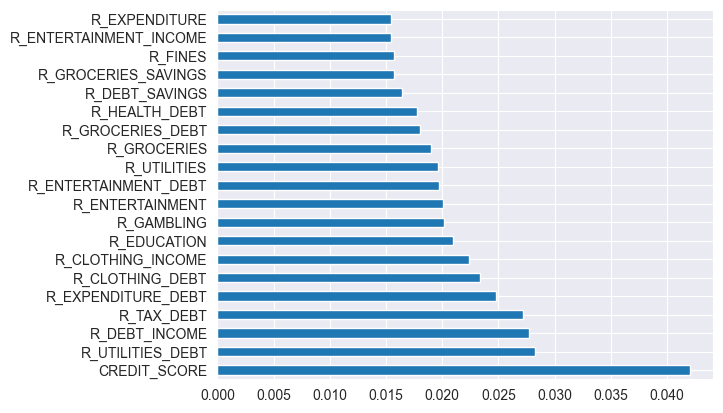

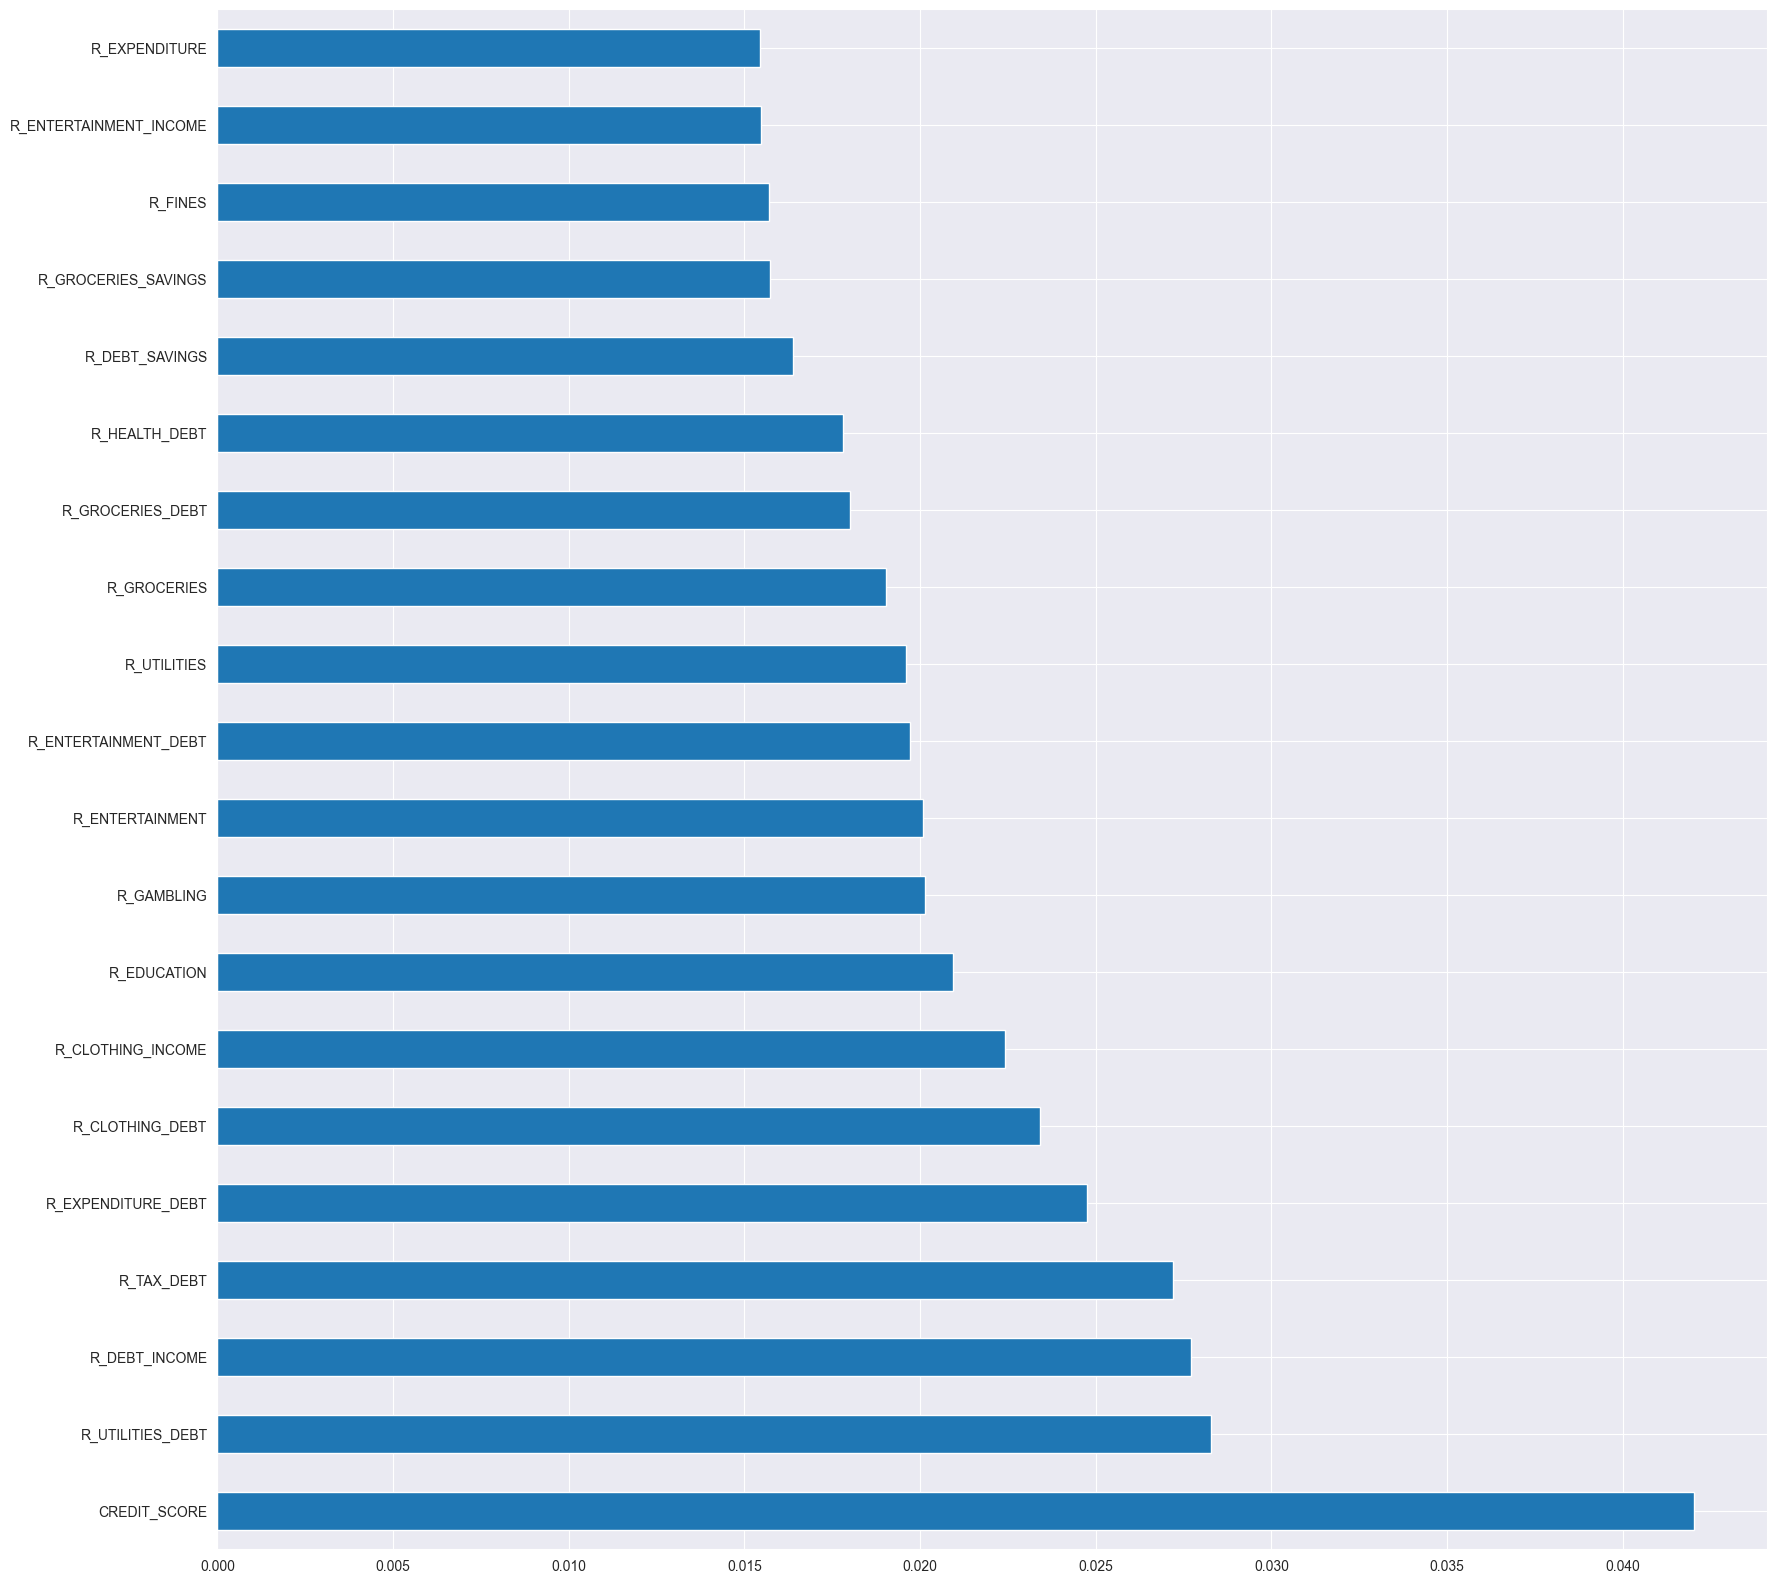

In [110]:
# take only 20 most important features
forest_importances.nlargest(20).plot(kind='barh')
#plot
plt.figure(figsize=(20,20))
forest_importances.nlargest(20).plot(kind='barh')

### WOW SOME COLUMNS ARE VERY IMPORTANT starting from letter R